<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Data</a></span><ul class="toc-item"><li><span><a href="#Train,-Val,-Test" data-toc-modified-id="Train,-Val,-Test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train, Val, Test</a></span></li><li><span><a href="#Check-train/test-shape" data-toc-modified-id="Check-train/test-shape-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Check train/test shape</a></span></li></ul></li><li><span><a href="#Seasonal-Patterns" data-toc-modified-id="Seasonal-Patterns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Seasonal Patterns</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Indexes-and-offsets" data-toc-modified-id="Indexes-and-offsets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Indexes and offsets</a></span></li><li><span><a href="#Split" data-toc-modified-id="Split-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Split</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot</a></span></li><li><span><a href="#Create-tf.data.Dataset_s" data-toc-modified-id="Create-tf.data.Dataset_s-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create tf.data.Dataset_s</a></span></li><li><span><a href="#Single-Step-Models" data-toc-modified-id="Single-Step-Models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Single Step Models</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#Dense" data-toc-modified-id="Dense-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Dense</a></span><ul class="toc-item"><li><span><a href="#Multi-Step-Dense" data-toc-modified-id="Multi-Step-Dense-10.3.1"><span class="toc-item-num">10.3.1&nbsp;&nbsp;</span>Multi-Step Dense</a></span></li></ul></li><li><span><a href="#Convolutional-Neural-Network" data-toc-modified-id="Convolutional-Neural-Network-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Convolutional Neural Network</a></span></li><li><span><a href="#Recurrent-Neural-Network" data-toc-modified-id="Recurrent-Neural-Network-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Recurrent Neural Network</a></span></li><li><span><a href="#Performance" data-toc-modified-id="Performance-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></div>

# Import Libraries

In [176]:
# Import all packages that I might need:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats
import IPython
import IPython.display

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
import tensorflow as tf

# Preprocessing

In [177]:
# Create dataframe from zillow median home price data
df = pd.read_csv(r'/Users/jimpetoskey/Documents/Flatiron/phase5/data/stock_prices.csv')

# make copy of df
df1 = df.copy()

# Look at top-performing stocks, choose top-performer to model
df1.sort_values(by='Target', ascending=False)

df.head(5)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [178]:
# Pull one stock's values for given stock from stock_prices
values8103 = df1.loc[df1['SecuritiesCode'] == 8103] 
values8103_copy = values8103.copy()
values8103_copy.head(2)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
1450,20170104_8103,2017-01-04,8103,406.0,413.0,395.0,413.0,82600,1.0,NaN,False,-0.024213
3315,20170105_8103,2017-01-05,8103,415.0,419.0,408.0,413.0,57500,1.0,NaN,False,-0.002481


In [179]:
values8103_copy['Date'] = pd.to_datetime(values8103_copy['Date'], format='%Y/%m/%d', errors='coerce')
mask = values8103_copy['Date'].isnull()
values8103_copy.loc[mask, 'Date'] = pd.to_datetime(values8103_copy['Date'], format='%Y/%m/%d',
                                             errors='coerce')
values8103_copy = values8103_copy.set_index('Date')
values8103_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1202 entries, 2017-01-04 to 2021-12-03
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowId             1202 non-null   object 
 1   SecuritiesCode    1202 non-null   int64  
 2   Open              1201 non-null   float64
 3   High              1201 non-null   float64
 4   Low               1201 non-null   float64
 5   Close             1201 non-null   float64
 6   Volume            1202 non-null   int64  
 7   AdjustmentFactor  1202 non-null   float64
 8   ExpectedDividend  10 non-null     float64
 9   SupervisionFlag   1202 non-null   bool   
 10  Target            1202 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 104.5+ KB


In [74]:
pd.set_option('display.max_rows', None)
values8103_copy['Date']

1450       2017-01-04
3315       2017-01-05
5180       2017-01-06
7045       2017-01-10
8910       2017-01-11
10775      2017-01-12
12640      2017-01-13
14505      2017-01-16
16370      2017-01-17
18235      2017-01-18
20100      2017-01-19
21965      2017-01-20
23830      2017-01-23
25695      2017-01-24
27560      2017-01-25
29425      2017-01-26
31290      2017-01-27
33155      2017-01-30
35020      2017-01-31
36885      2017-02-01
38750      2017-02-02
40615      2017-02-03
42480      2017-02-06
44345      2017-02-07
46210      2017-02-08
48075      2017-02-09
49940      2017-02-10
51805      2017-02-13
53670      2017-02-14
55535      2017-02-15
57400      2017-02-16
59265      2017-02-17
61130      2017-02-20
62995      2017-02-21
64860      2017-02-22
66725      2017-02-23
68591      2017-02-24
70457      2017-02-27
72323      2017-02-28
74189      2017-03-01
76055      2017-03-02
77921      2017-03-03
79787      2017-03-06
81654      2017-03-07
83521      2017-03-08
85388     

In [80]:
date = pd.to_datetime(values8103['Date'], errors='raise')
values8103 = values8103.set_index(date)
values8103.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1202 entries, 2017-01-04 to 2021-12-03
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowId             1202 non-null   object 
 1   Date              1202 non-null   object 
 2   SecuritiesCode    1202 non-null   int64  
 3   Open              1201 non-null   float64
 4   High              1201 non-null   float64
 5   Low               1201 non-null   float64
 6   Close             1201 non-null   float64
 7   Volume            1202 non-null   int64  
 8   AdjustmentFactor  1202 non-null   float64
 9   ExpectedDividend  10 non-null     float64
 10  SupervisionFlag   1202 non-null   bool   
 11  Target            1202 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 113.9+ KB


In [70]:
#values8103.set_index('Date')

In [5]:
values8103.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 1450 to 2332104
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowId             1202 non-null   object 
 1   Date              1202 non-null   object 
 2   SecuritiesCode    1202 non-null   int64  
 3   Open              1201 non-null   float64
 4   High              1201 non-null   float64
 5   Low               1201 non-null   float64
 6   Close             1201 non-null   float64
 7   Volume            1202 non-null   int64  
 8   AdjustmentFactor  1202 non-null   float64
 9   ExpectedDividend  10 non-null     float64
 10  SupervisionFlag   1202 non-null   bool   
 11  Target            1202 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 113.9+ KB


In [187]:
values8103 = df1.loc[df1['SecuritiesCode'] == 8103]
#values8103.reset_index()
values810 = values8103['Date'].astype('datetime64[ns]')
values810 = pd.DataFrame(values810)
values8103 = values8103.drop('Date', axis=1)
values8103['Date'] = values810['Date']
values8103 = values8103.set_index('Date')
#values8103
#values8103['Date'] = pd.to_numeric(values8103['Date'])
#values8103['Date'] = values8103['Date'].astype(float, errors = 'raise')
#values8103 = values8103.set_index(values8103['Date'])
#values8103.index = pd.to_datetime(values8103.index)
values8103.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1202 entries, 2017-01-04 to 2021-12-03
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowId             1202 non-null   object 
 1   SecuritiesCode    1202 non-null   int64  
 2   Open              1201 non-null   float64
 3   High              1201 non-null   float64
 4   Low               1201 non-null   float64
 5   Close             1201 non-null   float64
 6   Volume            1202 non-null   int64  
 7   AdjustmentFactor  1202 non-null   float64
 8   ExpectedDividend  10 non-null     float64
 9   SupervisionFlag   1202 non-null   bool   
 10  Target            1202 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 104.5+ KB


In [ ]:
values8103 = df1.loc[df1['SecuritiesCode'] == 8103] 
values8103 = values8103.set_index(pd.DatetimeIndex(values8103['Date']))
values8103.info()

# Split Data

## Train, Val, Test

In [304]:
values8103 = values8103_copy
values8103.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1202 entries, 2017-01-04 to 2021-12-03
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowId             1202 non-null   object 
 1   SecuritiesCode    1202 non-null   int64  
 2   Open              1201 non-null   float64
 3   High              1201 non-null   float64
 4   Low               1201 non-null   float64
 5   Close             1201 non-null   float64
 6   Volume            1202 non-null   int64  
 7   AdjustmentFactor  1202 non-null   float64
 8   ExpectedDividend  10 non-null     float64
 9   SupervisionFlag   1202 non-null   bool   
 10  Target            1202 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 104.5+ KB


In [305]:
# Split df into train, val, test
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(values8103)
train_df = values8103[0:int(n*0.7)]
val_df = values8103[int(n*0.7):int(n*0.9)]
test_df = values8103[int(n*0.9):]

num_features = values8103.shape[1]

In [306]:
num_features

11

## Check train/test shape

In [307]:
print('Training Shape:', train_df.shape)
print('Validation Shape:', val_df.shape)
print('Test Shape:', test_df.shape)

Training Shape: (841, 11)
Validation Shape: (240, 11)
Test Shape: (121, 11)


# Seasonal Patterns
* Fast Fourier Transform indicates there is not much of a seasonal pattern.

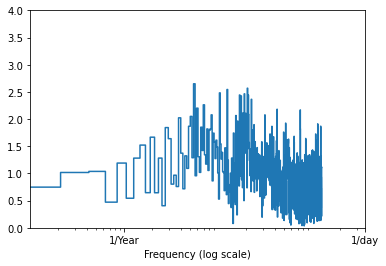

In [308]:
# Implement Fast Fourier Transform with Target over time
fft = tf.signal.rfft(values8103['Target'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(values8103['Target'])
# Number of trading days per year
days_per_year = 253
# Also worth noting that no pattern is observed when 365 is used

years_per_dataset = n_samples_h/(days_per_year)

# Plot Transform
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 4)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# Feature Engineering

In [309]:
def feature_eng(train):
    
    # Set Datetime index
    #date = train['Date'].astype('datetime64[ns]')
    #date = pd.DataFrame(date)
    #train = train.drop('Date', axis=1)
    #train['Date'] = date['Date']
    #train = train.set_index('Date')
    
    
    # Drop irrelevant columns for training
    train = train.drop(
                        ['RowId', 
                         'SecuritiesCode', 
                         'ExpectedDividend', 
                         'SupervisionFlag',
                         'AdjustmentFactor'], axis=1)
    
    # Bool to int for SupervisionFlag
    #train["SupervisionFlag"] = train["SupervisionFlag"].astype(int)
    
    # Forward, then backward fill missing values in cols
    cols = ['Open', 'High', 'Low', 'Close', 'Target']
    train.loc[:,cols] = train.loc[:,cols].ffill()
    train.loc[:,cols] = train.loc[:,cols].bfill()
    
    # Replace missing values in ExpectedDividend with 0
    #train['ExpectedDividend'] = train['ExpectedDividend'].fillna(0)
    
    # Add Features
    train['Daily_Spread'] = train['Close'] - train['Open']
    train['Daily_Max_Min'] = train['High'] - train['Low']
    train['1_Day_Spread'] = train['Close'].diff()
    train['2_Day_Spread'] = train['Close'].diff(periods=2)
    train['1_Week_Spread'] = train['Close'].diff(periods=5)
    train['MA_Prior_1day'] = train['Close'].diff(periods= -1)
    train['MA_Prior_2day'] = train['Close'].diff(periods= -2)
    train = train.fillna(0)
    train['MA_Prior_diff'] = train['MA_Prior_1day'] - train['MA_Prior_2day']
    
    # Fill missing values with 0
    train = train.fillna(0)
        
    # Add rolling ratio of mean/std of forward 1 day return
    indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=2)
    train['ExPost_SR'] = (train['MA_Prior_diff'].rolling(
        window=indexer, min_periods=1).mean())/(
        train['MA_Prior_diff'].std())
    
    # Add zscored columns and drop raw columns
    #columns = train.columns.values.tolist()
    
    # Z-Score Normalize each column (-1 to 1 scale)
    #for c in columns:
    #    train[str(c)] = stats.zscore(train[str(c)])
    
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(train)
    train_cols = train.columns.values.tolist()
    trained = pd.DataFrame(data=scaled, columns=train_cols, index=train.index)
    
    # Fill missing values with 0
    #train = train.fillna(0)
    
    return trained

In [310]:
train_df = feature_eng(train_df)
val_df = feature_eng(val_df)
test_df = feature_eng(test_df)

In [325]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,841.0,0.436931,0.213760,0.0,0.280528,0.435644,0.534653,1.0
High,841.0,0.387683,0.194860,0.0,0.244048,0.386905,0.479167,1.0
Low,841.0,0.441390,0.211605,0.0,0.291391,0.440397,0.539735,1.0
Close,841.0,0.429251,0.216582,0.0,0.270903,0.424749,0.528428,1.0
Volume,841.0,0.033519,0.072777,0.0,0.006126,0.011594,0.028821,1.0
Target,841.0,0.335246,0.067935,0.0,0.306626,0.333964,0.362442,1.0
Daily_Spread,841.0,0.389458,0.076751,0.0,0.355932,0.389831,0.423729,1.0
Daily_Max_Min,841.0,0.161648,0.113453,0.0,0.094595,0.135135,0.189189,1.0
1_Day_Spread,841.0,0.448579,0.073679,0.0,0.420690,0.448276,0.475862,1.0
2_Day_Spread,841.0,0.507948,0.079232,0.0,0.477612,0.507463,0.537313,1.0


In [326]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 841 entries, 2017-01-04 to 2020-06-15
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           841 non-null    float64
 1   High           841 non-null    float64
 2   Low            841 non-null    float64
 3   Close          841 non-null    float64
 4   Volume         841 non-null    float64
 5   Target         841 non-null    float64
 6   Daily_Spread   841 non-null    float64
 7   Daily_Max_Min  841 non-null    float64
 8   1_Day_Spread   841 non-null    float64
 9   2_Day_Spread   841 non-null    float64
 10  1_Week_Spread  841 non-null    float64
 11  MA_Prior_1day  841 non-null    float64
 12  MA_Prior_2day  841 non-null    float64
 13  MA_Prior_diff  841 non-null    float64
 14  ExPost_SR      841 non-null    float64
dtypes: float64(15)
memory usage: 105.1 KB


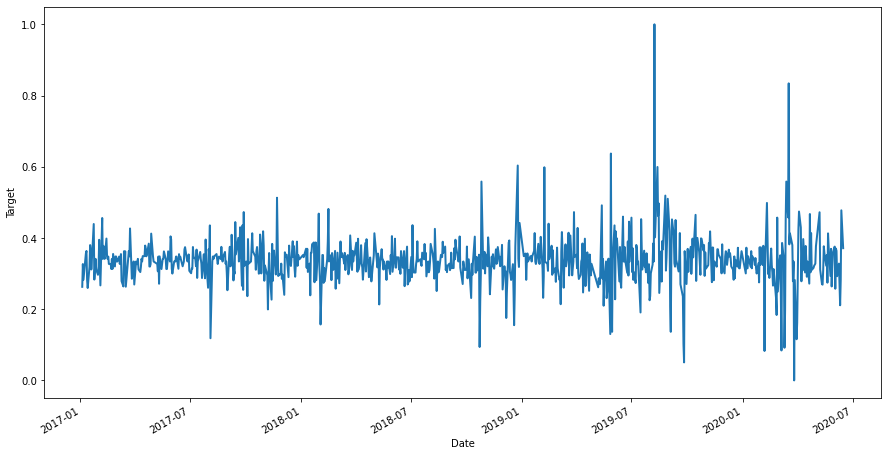

In [327]:
# Plot the timeseries 
pd.plotting.register_matplotlib_converters()
ax = train_df['Target'].plot(figsize=(15, 8), linewidth=2)
ax.set_ylabel('Target')
ax.set_xlabel('Date')

plt.show()

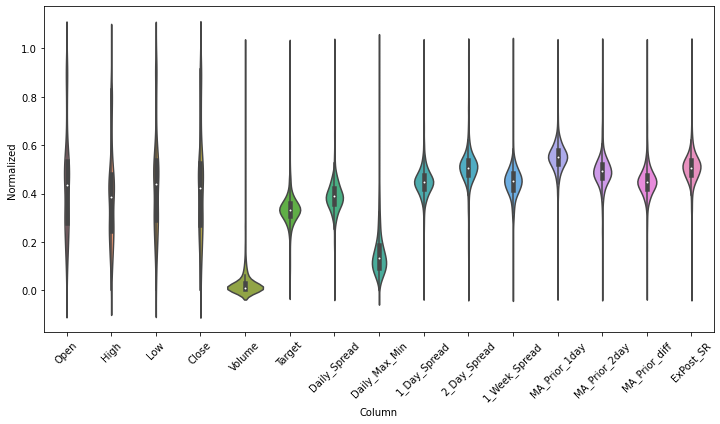

In [328]:
df_std = train_df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train_df.keys(), rotation=45)

In [329]:
train_small = train_df.drop(['MA_Prior_2day','1_Week_Spread','Close','Low','High','ExPost_SR'], axis=1)
train_small.head(2)

,Open,Volume,Target,Daily_Spread,Daily_Max_Min,1_Day_Spread,2_Day_Spread,MA_Prior_1day,MA_Prior_diff
Date,,,,,,,,,
2017-01-04,0.217822,0.026252,0.262805,0.449153,0.243243,0.448276,0.507463,0.551724,0.379310
2017-01-05,0.247525,0.017984,0.326672,0.372881,0.148649,0.448276,0.507463,0.620690,0.441379


In [330]:
# Double-check for missing values
train_small.isna().sum()

Open             0
Volume           0
Target           0
Daily_Spread     0
Daily_Max_Min    0
1_Day_Spread     0
2_Day_Spread     0
MA_Prior_1day    0
MA_Prior_diff    0
dtype: int64

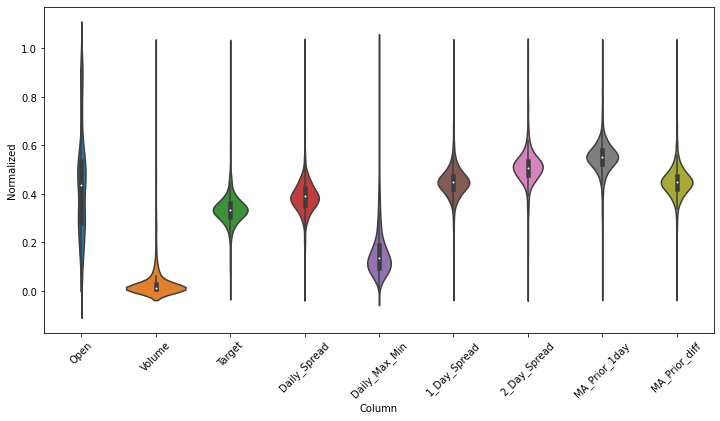

In [331]:
df_std = train_small.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train_small.keys(), rotation=45)

# Indexes and offsets
* Window Generator

In [332]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [333]:
w1 = WindowGenerator(input_width=20, label_width=1, shift=1,
                     label_columns=['Target'])
w1

Total window size: 21
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Label indices: [20]
Label column name(s): ['Target']

In [334]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Target'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Target']

# Split

In [335]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [336]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size]),
                           np.array(train_df[300:300+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 15)
Inputs shape: (3, 6, 15)
Labels shape: (3, 1, 1)


# Plot

In [337]:
w2.example = example_inputs, example_labels

In [338]:
def plot(self, model=None, plot_col='Target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

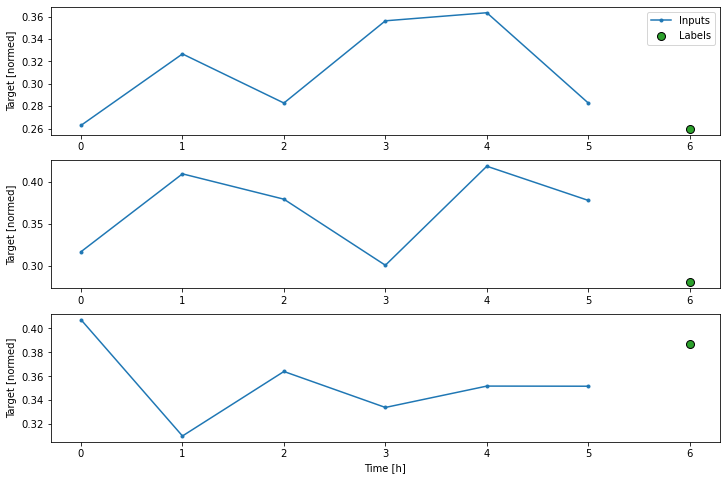

In [339]:
w2.plot()

# Create tf.data.Dataset_s

In [340]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [341]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [342]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 15), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [343]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 15)
Labels shape (batch, time, features): (32, 1, 1)


# Single Step Models

In [344]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Target']

In [345]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 15)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline

In [346]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [348]:
baseline = Baseline(label_index=column_indices['Target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

8/8 [==============================] - 0s 2ms/step - loss: 0.0470 - mean_absolute_error: 0.1697


In [349]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Target'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Target']

In [350]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


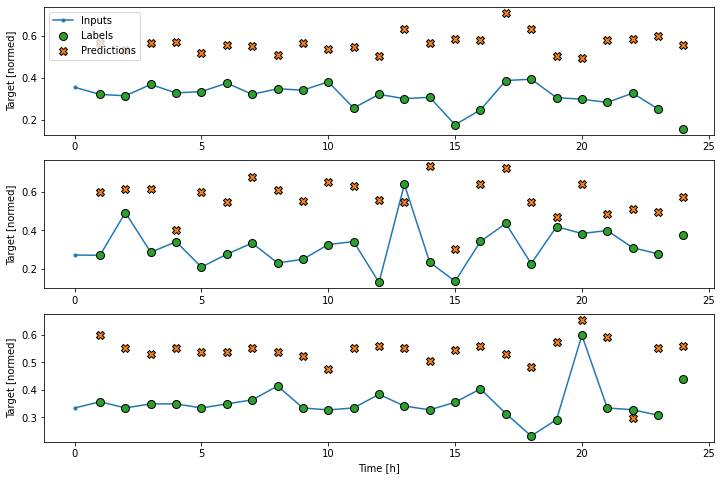

In [351]:
wide_window.plot(baseline)

## Linear Model

In [352]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [353]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 15)
Output shape: (32, 1, 1)


In [354]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [355]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
27/27 [==============================] - 1s 11ms/step - loss: 1.0849 - mean_absolute_error: 1.0319 - val_loss: 0.6767 - val_mean_absolute_error: 0.7861
Epoch 2/20
27/27 [==============================] - 0s 6ms/step - loss: 0.7439 - mean_absolute_error: 0.8506 - val_loss: 0.4009 - val_mean_absolute_error: 0.5902
Epoch 3/20
27/27 [==============================] - 0s 6ms/step - loss: 0.4918 - mean_absolute_error: 0.6863 - val_loss: 0.2226 - val_mean_absolute_error: 0.4211
Epoch 4/20
27/27 [==============================] - 0s 6ms/step - loss: 0.3160 - mean_absolute_error: 0.5430 - val_loss: 0.1191 - val_mean_absolute_error: 0.2902
Epoch 5/20
27/27 [==============================] - 0s 6ms/step - loss: 0.1993 - mean_absolute_error: 0.4206 - val_loss: 0.0677 - val_mean_absolute_error: 0.2102
Epoch 6/20
27/27 [==============================] - 0s 6ms/step - loss: 0.1261 - mean_absolute_error: 0.3225 - val_loss: 0.0501 - val_mean_absolute_error: 0.1838
Epoch 7/20
27/27 [=========

In [356]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


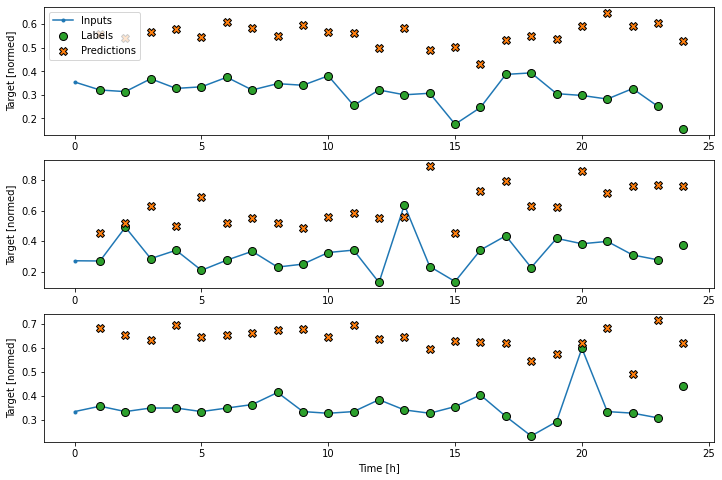

In [357]:
wide_window.plot(linear)

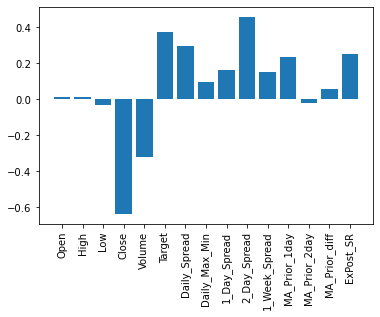

In [358]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Dense

In [359]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
27/27 [==============================] - 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0967 - val_loss: 0.0704 - val_mean_absolute_error: 0.2411
Epoch 2/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0043 - mean_absolute_error: 0.0449 - val_loss: 0.0560 - val_mean_absolute_error: 0.2129
Epoch 3/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0378 - val_loss: 0.0612 - val_mean_absolute_error: 0.2275
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0732 - mean_absolute_error: 0.2546


### Multi-Step Dense

In [360]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Target'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Target']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

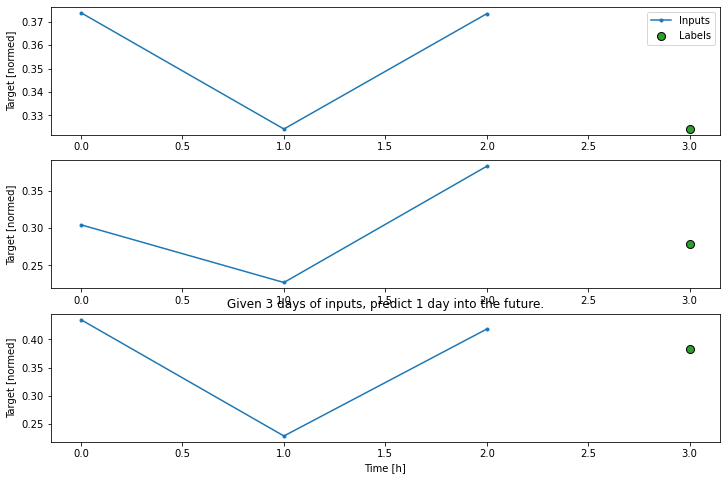

In [361]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [362]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [363]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 15)
Output shape: (32, 1, 1)


In [364]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 2ms/step - loss: 0.0333 - mean_absolute_error: 0.1529


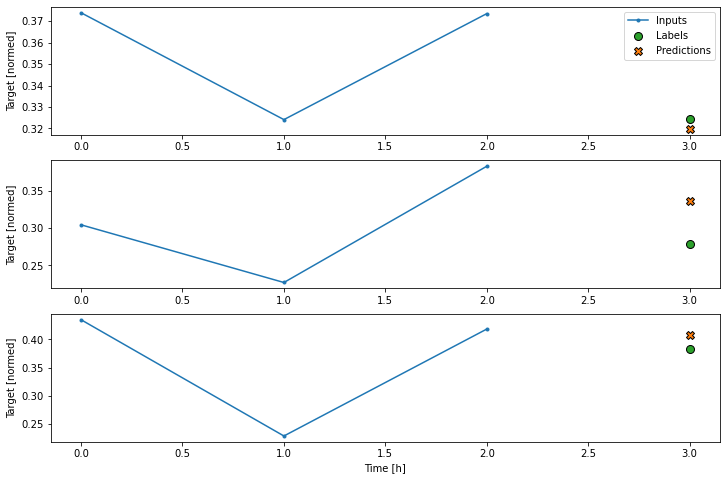

In [365]:
conv_window.plot(multi_step_dense)

In [366]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 15)

ValueError:Exception encountered when calling layer "sequential_10" (type Sequential).

Input 0 of layer "dense_19" is incompatible with the layer: expected axis -1 of input shape to have value 45, but received input with shape (32, 360)

Call arguments received by layer "sequential_10" (type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 15), dtype=float32)
  • training=None
  • mask=None


## Convolutional Neural Network

In [367]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [368]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 15)
Output shape: (32, 1, 1)


In [369]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 2ms/step - loss: 0.0520 - mean_absolute_error: 0.2102


In [370]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 15)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [371]:
LABEL_WIDTH = 20
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Target'])

wide_conv_window

Total window size: 23
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label column name(s): ['Target']

In [372]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 22, 15)
Labels shape: (32, 20, 1)
Output shape: (32, 20, 1)


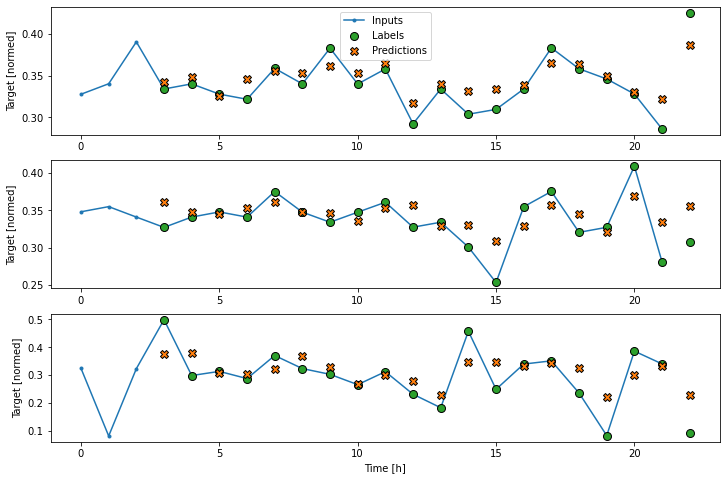

In [373]:
wide_conv_window.plot(conv_model)

## Recurrent Neural Network

In [374]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [375]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


In [376]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

7/7 [==============================] - 0s 5ms/step - loss: 0.0625 - mean_absolute_error: 0.2157


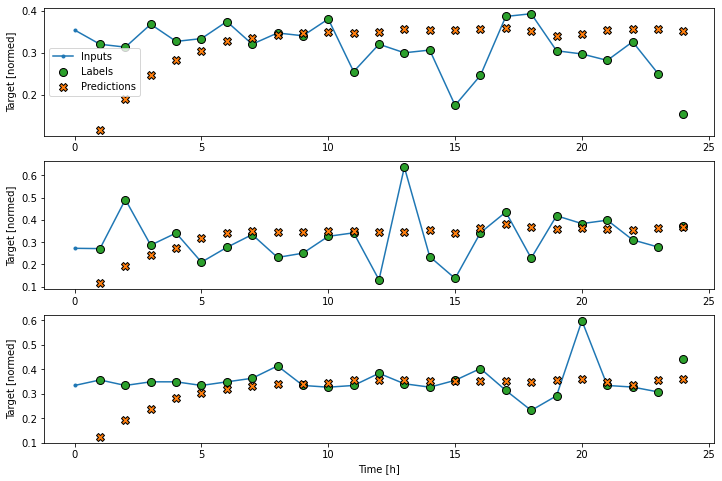

In [377]:
wide_window.plot(lstm_model)

## Performance

In [378]:
val_performance

{'Baseline': [0.047045137733221054, 0.16966544091701508],
 'Linear': [0.06069612130522728, 0.20009921491146088],
 'Dense': [0.0731828585267067, 0.2545854151248932],
 'Multi step dense': [0.03326472267508507, 0.1528588980436325],
 'Conv': [0.05200702324509621, 0.21024255454540253],
 'LSTM': [0.06249561533331871, 0.2157357931137085]}

In [379]:
performance

{'Baseline': [0.3410443663597107, 0.574988603591919],
 'Linear': [0.058289822190999985, 0.20155860483646393],
 'Dense': [0.015784192830324173, 0.11236093193292618],
 'Multi step dense': [0.01490285899490118, 0.10525548458099365],
 'Conv': [0.01205158419907093, 0.088608518242836],
 'LSTM': [0.027716930955648422, 0.1468944400548935]}

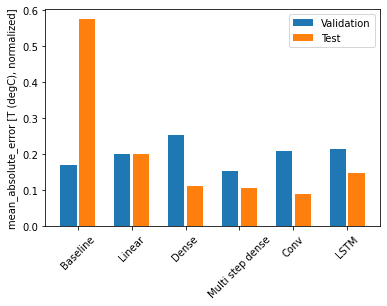

In [380]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [381]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.5750
Linear      : 0.2016
Dense       : 0.1124
Multi step dense: 0.1053
Conv        : 0.0886
LSTM        : 0.1469
